In [1]:
import numpy as np
import random
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K
from matplotlib.pyplot import imshow
from PIL import Image

Using TensorFlow backend.


In [4]:
model_name = 'LeNet'
epoch = ''

json_file = open(model_name + "_arch.json", 'r')
loaded_json = json_file.read()
json_file.close()
model = model_from_json(loaded_json)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

In [5]:
if epoch != '':
    model.load_weights('weigths/' + model_name + '_' + epoch + '_weig.h5')
else:
    model.load_weights('weigths/' + model_name + '_weig.h5')

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(), metrics=['accuracy'])


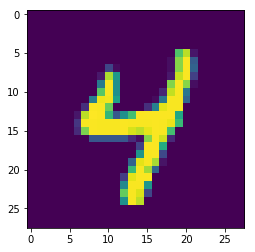

In [6]:
(_, _), (test_x, test_y) = mnist.load_data()

num = int(random.random() * 10000)
testImage = (np.array(test_x[num], dtype='float')).reshape(28, 28)
imshow(testImage)

In [7]:
if model_name == 'basic' or model_name == 'basic3':
    test = test_x[num].reshape((1, 784)).astype('float32') / 255
    print(model.predict_classes(test))
if model_name == 'LeNet' or model_name == 'LeNet_bn':
    test = test_x[num].astype('float32') / 255
    test = test[np.newaxis, :, :, np.newaxis]
    print(model.predict_classes(test))


[4]
